<a href="https://colab.research.google.com/github/rachitt-t/AI-in-healthcare/blob/main/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

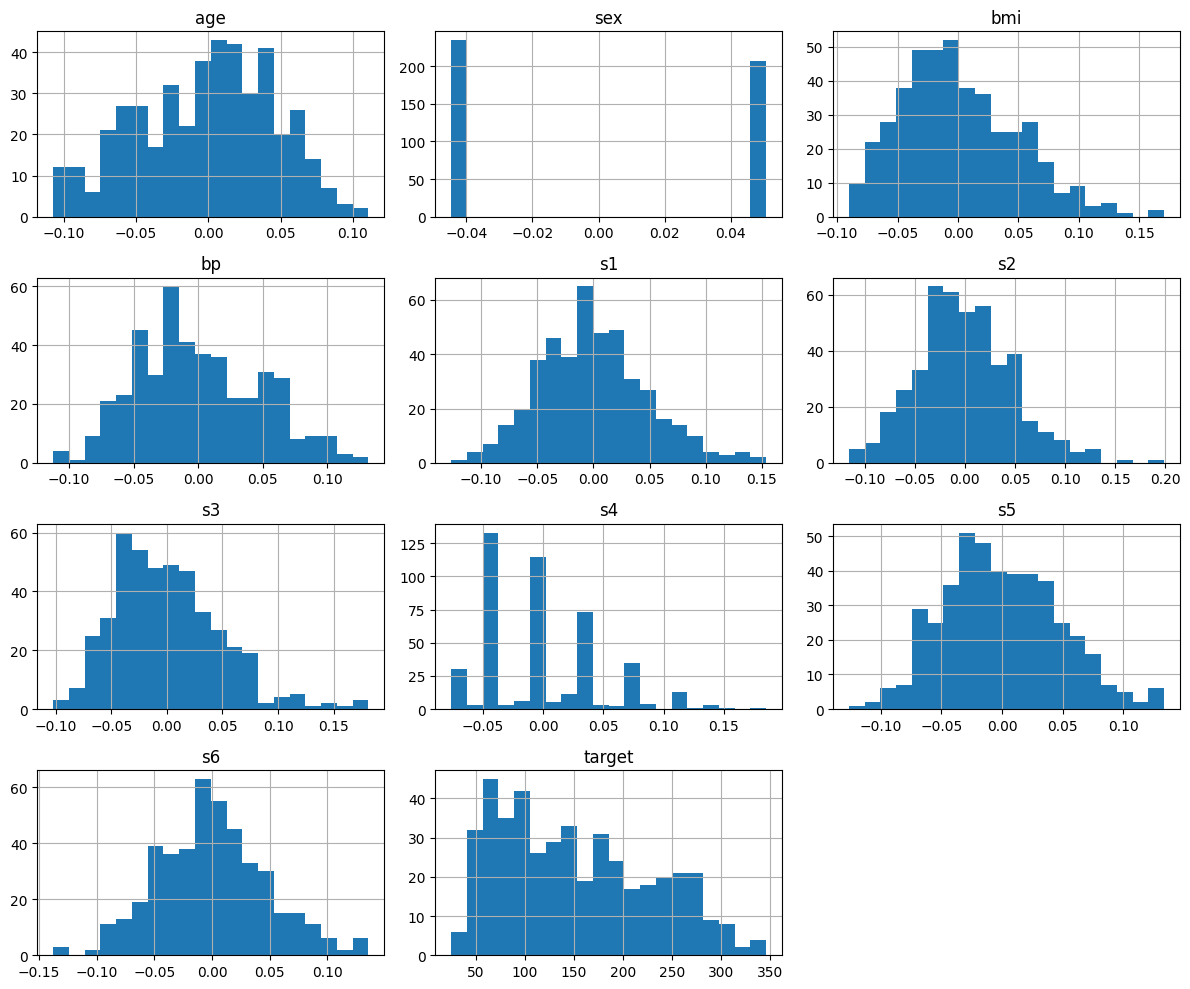

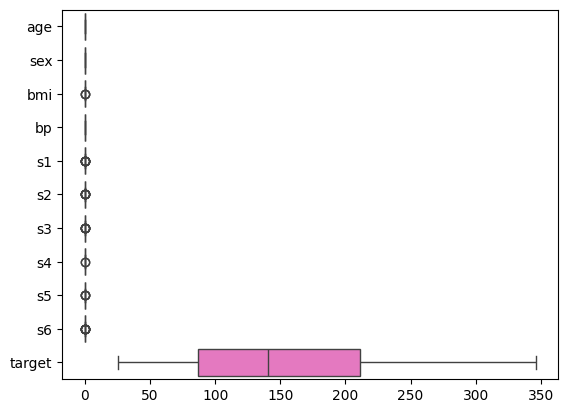

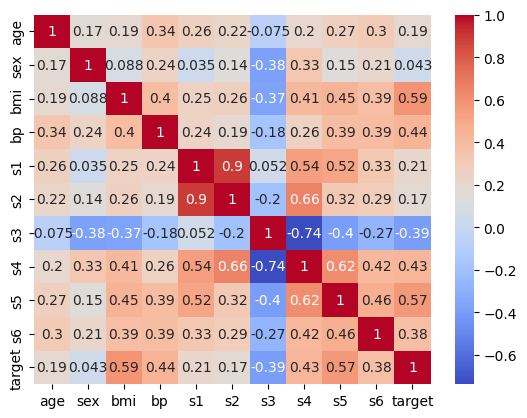

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
print(df.describe())
print(df.isnull().sum().sum())
print(df.duplicated().sum())
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()
sns.boxplot(data=df, orient='h')
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [2]:
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['target'])
scaler = StandardScaler()
X_std = scaler.fit_transform(features)
print(X_std.shape)


(442, 10)


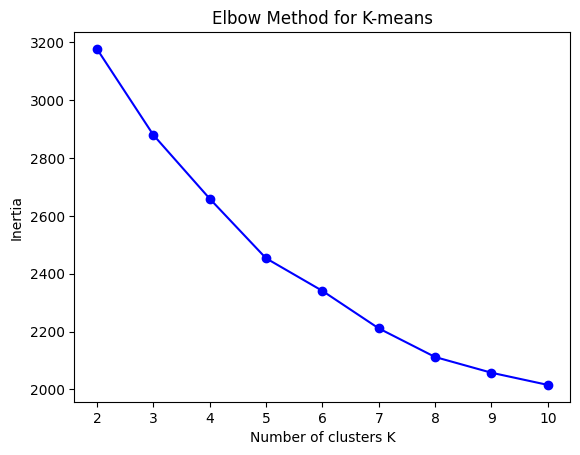

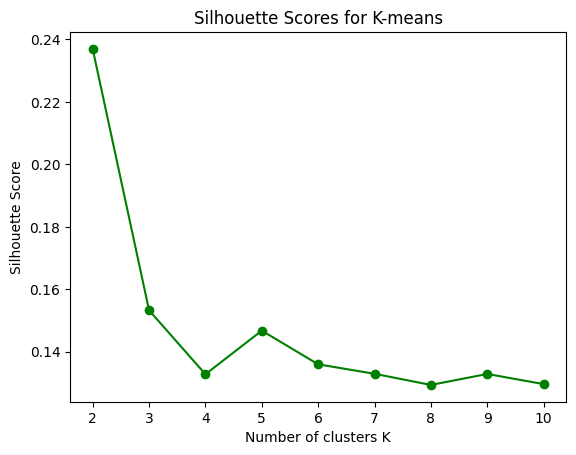

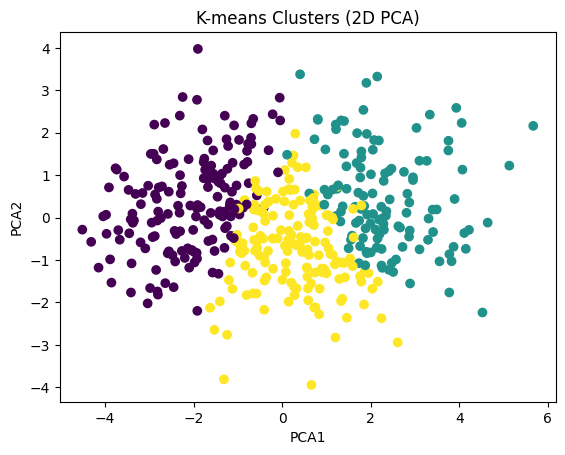

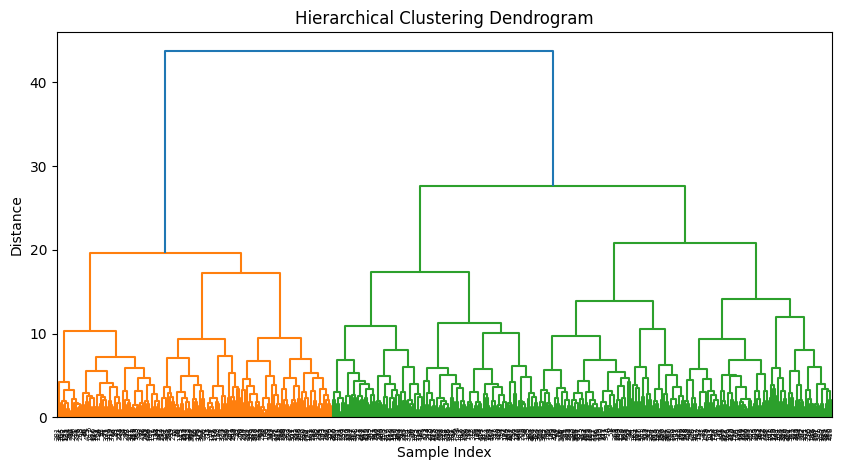

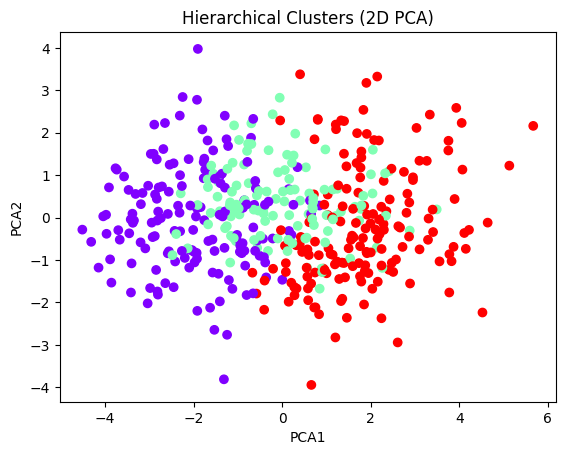

In [3]:
# Task 3: Model Training and Basic Evaluation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

# (A) K-means clustering, elbow method, silhouette
inertias = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_std, kmeans.labels_))

plt.plot(K_range, inertias, 'bo-', label='Inertia')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.show()

plt.plot(K_range, sil_scores, 'go-', label='Silhouette Score')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-means')
plt.show()

# Pick optimal K (for demonstration, suppose K=3)
opt_k = 3
kmeans = KMeans(n_clusters=opt_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_std)

# Visualize clusters in 2D (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='viridis')
plt.title('K-means Clusters (2D PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# (B) Agglomerative (hierarchical) clustering
Z = linkage(X_std, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Decide clusters by cutting dendrogram (e.g., 3)
clusters_hier = fcluster(Z, t=opt_k, criterion='maxclust')
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hier, cmap='rainbow')
plt.title('Hierarchical Clusters (2D PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# (C) Compare and interpret results: Discuss in text box
# Write your comparison of K-means vs hierarchical clustering below the code cells.
